In [1]:
#####################################################################################################################################################
#####################################################################################################################################################
################################ PROGRAM TO CREATE CUSTOMER SEGMENTS USING KMEANS CLUSTERING METHOD #################################################
#####################################################################################################################################################
#####################################################################################################################################################

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
###################################################### Read Mall Customer Data #####################################################################
customer_df = pd.read_csv('../data/Mall_Customers.csv')
customer_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
###################################### Get the Relevant Columns for Clustering ###################################################################
relevant_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
customer_df_cols = customer_df[relevant_cols]

In [5]:
################################### Standardize the columns to standard normal distribution #######################################################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customer_df_cols)
scaled_data = scaler.transform(customer_df_cols)

In [6]:
####################################################################################################################################################
################################### Determine best number of clusters using elbow plot #############################################################
####################################################################################################################################################

def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(1, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
    return clusters_centers, k_values

def generate_elbow_plot(clusters_centers, k_values):
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

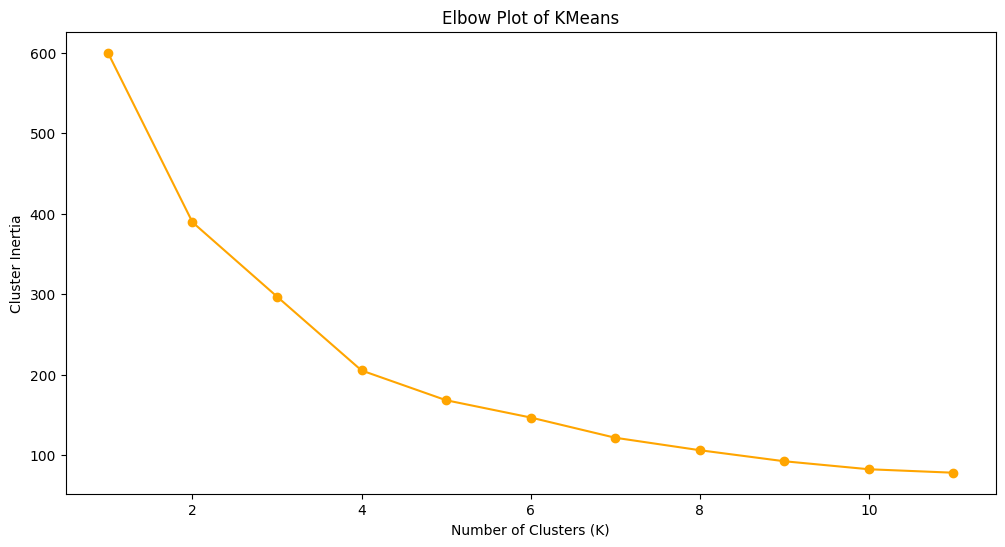

In [7]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)
generate_elbow_plot(clusters_centers, k_values)

In [8]:
####################################################################################################################################################
################################### Create KMeans clusters using the best number of clusters #######################################################
####################################################################################################################################################

kmeans_model = KMeans(n_clusters = 5)
kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [9]:
customer_df["clusters"] = kmeans_model.labels_
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


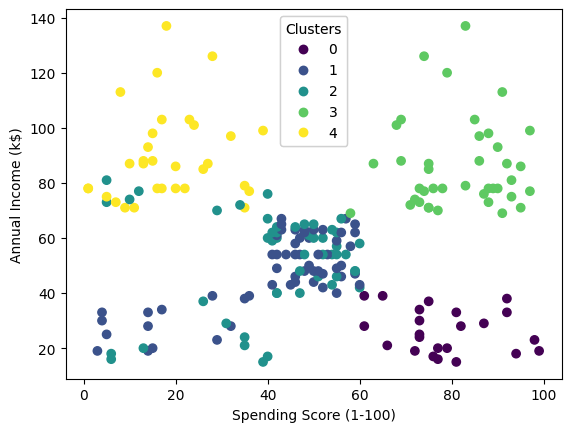

In [10]:
################################################### Visualize the Clusters ########################################################################
fig, ax = plt.subplots()
scatter = ax.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"], 
            c = customer_df["clusters"])

# Create a legend with unique colors from the scatter plot
legend1 = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
ax.add_artist(legend1) # Add the legend to the axes

ax.set_xlabel("Spending Score (1-100)")
ax.set_ylabel("Annual Income (k$)")
plt.show()